# Livrable 2 

## I. Introduction

Dans le cadre de notre engagement continu envers des solutions de mobilité urbaine durable, ce livrable se concentre sur l'avancement de notre projet initié en réponse à l'appel de l'Agence de l’Environnement et de la Maîtrise de l’Énergie (ADEME). L'objectif principal reste de développer des méthodes efficaces pour optimiser les tournées de livraison en milieu urbain, en réduisant la consommation énergétique et les émissions de CO2, tout en maintenant ou en améliorant les niveaux de service.

### Contexte

La nécessité de solutions innovantes pour la gestion de la logistique urbaine devient de plus en plus impérative face aux défis environnementaux actuels. Les villes, confrontées à l'augmentation des coûts de transport et aux impacts environnementaux néfastes, cherchent des moyens de gérer efficacement le trafic et de réduire les émissions polluantes. Notre projet vise à répondre à ces défis en utilisant des techniques algorithmiques avancées pour planifier de manière optimale les tournées des véhicules de livraison.

### Objectifs du Livrable

Ce deuxième livrable vise à étendre notre modèle initial en intégrant des algorithmes plus sophistiqués et des heuristiques pour améliorer la résolution du problème de tournées de véhicules (Vehicle Routing Problem, VRP). Nous explorerons comment différentes approches peuvent contribuer à une plus grande efficacité logistique et à une réduction des impacts environnementaux :
- **Développement et implémentation de nouveaux algorithmes** : Nous introduirons de nouvelles méthodes de résolution qui prennent en compte des contraintes additionnelles telles que les fenêtres de temps et les capacités variables des véhicules.
- **Analyse de la complexité et optimisation des performances** : Évaluation de la complexité des nouvelles approches et optimisation de leur performance pour des instances de grande taille.
- **Validation expérimentale** : Tests des algorithmes sur des scénarios réalistes pour valider leur efficacité et leur applicabilité en conditions réelles.

L'accent sera mis sur la robustesse des solutions proposées et leur capacité à s'adapter à diverses conditions opérationnelles, en visant une amélioration tangible des performances par rapport aux solutions existantes.

### Choix des Algorithmes

Nous avons sélectionné deux algorithmes distincts pour aborder le problème des tournées de véhicules (VRP) : l'algorithme  liste tabu et l'optimisation avec PuLP et le solveur Simplex. Ce choix repose sur plusieurs considérations :
1. **Complémentarité des Méthodes** : Chaque algorithme apporte des forces différentes. PuLP avec le solveur Simplex permet de vérifier la qualité des solutions trouvées par les heuristiques en fournissant des solutions optimales pour des instances plus petites.
2. **Robustesse et Flexibilité** : En utilisant une combinaison de méthodes heuristiques et exactes, nous pouvons obtenir des solutions robustes et flexibles qui s'adaptent à divers scénarios et contraintes logistiques.
3. **Validation et Comparaison** : L'utilisation de plusieurs algorithmes permet de valider les résultats obtenus, d'identifier les points forts et les faiblesses de chaque méthode, et d'améliorer continuellement les approches.


## II. Développement Algorithmique

Cette section détaille les techniques et algorithmes utilisés pour optimiser les tournées de livraison, tout en mettant l'accent sur la minimisation de la distance parcourue, sans intégration systématique des contraintes de capacité des véhicules ou des fenêtres de temps pour simplifier la comparaison entre les méthodes.

### Objectifs et Contraintes

#### Objectif :
$$\min \sum_{i=0}^k d_{ij} x_{ij}$$
- **Minimiser** le coût total des tournées, principalement représenté par la distance parcourue et le temps de trajet. L'objectif est de réduire l'impact environnemental en diminuant la distance totale parcourue par les véhicules.

#### Contraintes :
$$\sum_{j=1}^n x_{ij} = 1 \quad \forall i \in V$$
$$\sum_{i=1}^n x_{ij} = 1 \quad \forall j \in V$$
$$x_{ij} \in \{0,1\}$$
- **Unicité de Visite** : Chaque ville doit être visitée exactement une fois pour assurer que toutes les livraisons nécessaires sont effectuées.
- **Continuité** : Assurer que si une ville \( j \) est visitée immédiatement après une ville \( i \), alors le trajet de \( i \) à \( j \) doit être inclus dans la tournée.

### Description des Algorithmes


**1. Modélisation et optimisation avec PuLP et Solveur Simplex**
- **Objectif** : Trouver des solutions optimales pour les tournées de véhicules en minimisant la distance totale parcourue.
- **Méthode** : Utilisation de la programmation linéaire pour modéliser le problème et le résoudre à l'aide du solveur Simplex sans intégrer les contraintes de capacité.
- **Pseudocode** :
  - Définir les variables de décision et les contraintes du problème.
  - Formuler la fonction objectif (minimisation de la distance totale).
  - Résoudre le problème avec le solveur Simplex.
  - Extraire et retourner les routes optimales.

**2. Algorithme de Tabu Search pour le VRP**

- **Objectif** : Minimiser le coût total des tournées, en se concentrant uniquement sur la distance parcourue.
- **Méthode** : Utilisation de la technique de recherche tabou pour optimiser les tournées de véhicules.
- **Pseudocode** :
  - Générer une solution initiale (répartition aléatoire des villes entre les véhicules).
  - Répéter pour un nombre d'itérations donné :
      - Générer un voisinage en permutant des villes dans les tournées actuelles.
      - Évaluer le coût des solutions voisines.
      - Mettre à jour la solution actuelle si une meilleure solution est trouvée, tout en respectant la liste tabou.
  - Retourner la meilleure solution trouvée.

### Analyse de la Complexité

L'analyse de la complexité des algorithmes est essentielle pour évaluer leur efficacité et leur faisabilité pour des instances de différentes tailles.

#### Complexité Temporelle

**1. Optimisation avec PuLP et le Solveur Simplex**
- **Complexité Temporelle** : La résolution du problème VRP avec PuLP et le solveur Simplex a une complexité qui peut être considérée comme `O(n^3)` dans le cas général, dépendant de la méthode de résolution utilisée par le solveur linéaire, où `n` est le nombre de variables et de contraintes.

**2. Recherche Tabou pour le VRP**
- **Complexité Temporelle** : La complexité de la recherche Tabou dépend fortement de la taille du voisinage exploré et du nombre d'itérations réalisées. Typiquement, si chaque solution a un voisinage de taille `V` et que l'algorithme s'exécute pour `I` itérations, la complexité peut être approximée par `O(I * V)`. Le calcul exact de la complexité peut varier en fonction des opérations spécifiques effectuées pour générer le voisinage et vérifier la liste tabou.

#### Complexité Spatiale

**1. Optimisation avec PuLP et le Solveur Simplex**
- **Complexité Spatiale** : La complexité spatiale de cette approche dépend de la taille du problème linéaire, avec une complexité approximative de `O(n^2)` pour le stockage des variables et des contraintes.

**2. Recherche Tabou pour le VRP**
- **Complexité Spatiale** : La complexité spatiale de la recherche Tabou inclut le stockage des solutions actuelles et de la liste tabou. Si la taille maximale de la liste tabou est `T` et la représentation de chaque solution nécessite `S` espace, la complexité spatiale peut être exprimée comme `O(T * S)`.

### Implications Pratiques

Ces analyses montrent que bien que les algorithmes soient adaptés pour des instances de taille petite à moyenne, le coût de calcul peut devenir prohibitif pour de très grandes instances. Pour surmonter ces défis, l'utilisation de techniques de parallélisme ou l'application de heuristiques supplémentaires peut être nécessaire pour améliorer les performances. Les heuristiques initiales efficaces peuvent également réduire le temps de calcul en fournissant des solutions de départ proches de l'optimal, nécessitant moins d'itérations pour converger.


## III. Implémentation

L'implémentation des algorithmes choisis pour ce projet est réalisée en Python, utilisant principalement les bibliothèques NetworkX pour la gestion des graphes et NumPy pour les calculs numériques. Nous proposons deux méthodes de modélisation de graphes, chacune adaptée à différents objectifs de simulation. Il est important de sélectionner et d'utiliser uniquement une des deux méthodes pour éviter des conflits dans la gestion des données.

In [ ]:
pip install -r requirements.txt

### Importation des differents modules

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
import numpy as np
import random
import pulp
import time


### Choix de la Modélisation du Graphe

Avant de procéder à l'implémentation, veuillez choisir entre :

1. Génération et Modélisation du Graphe en mode aléatoire : Cette méthode est recommandée pour des tests dynamiques et des analyses de robustesse. Elle génère un graphe aléatoire où les nœuds et les arêtes sont créés avec des attributs aléatoires.

2. Modélisation du Graphe basée sur le Projet : Cette méthode utilise un graphe prédéfini qui imite une structure réelle ou un cas d'étude spécifique. Elle est utile pour des simulations qui nécessitent un environnement contrôlé ou des données spécifiques.

Assurez-vous de ne lancer que le bloc de code correspondant au choix de la modélisation du graphe pour éviter tout conflit de données ou d'exécution.

### 1. Génération et Modélisation du Graphe en mode aléatoire
Ce modèle génère un graphe où les nœuds représentent des entités telles que des utilisateurs ou des villes, et les arêtes des connexions avec des poids symbolisant des distances ou des coûts de transport. Nous avons utiliser la formule du calcul de la distance euclidienne entre les la positions de deux points. Voici notre code pour générer un tel graphe :

Nombre de véhicules utilisés : 4


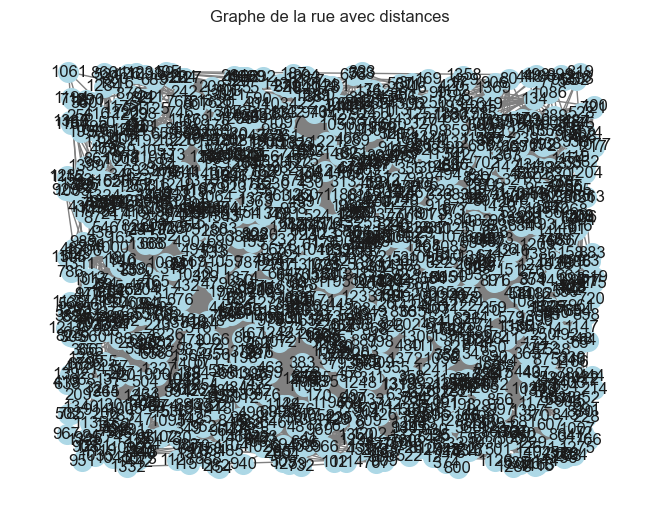

In [134]:
# Création du graphe
G = nx.Graph()

# Ajout des utilisateurs
randomNumber = random.randint(1000, 1500)
users = list(range(1, randomNumber + 1))

# Ajout des nœuds dans le graphe
G.add_nodes_from(users)

# Génération des positions aléatoires pour les utilisateurs
positions = {user: (random.uniform(0, 500), random.uniform(0, 500)) for user in users}

# Ajout des amitiés avec distances basées sur les positions
for i in range(randomNumber):
    numFriends = random.randint(1, 5)  # Chaque utilisateur aura entre 1 et 5 amis
    for _ in range(numFriends):
        while True:
            friend = random.randint(1, int(randomNumber/10))
            if friend != i + 1 and not G.has_edge(i + 1, friend):
                # Calcul de la distance euclidienne entre les positions
                pos_i = positions[i + 1]
                pos_friend = positions[friend]
                distance = np.sqrt((pos_i[0] - pos_friend[0]) ** 2 + (pos_i[1] - pos_friend[1]) ** 2)
                G.add_edge(i + 1, friend, weight=distance)
                break


# Nombre aléatoire de véhicules
num_vehicles = random.randint(2, 5)  
G.graph['num_vehicles'] = num_vehicles

# Affichage des capacités des véhicules et demandes des villes
print("Nombre de véhicules utilisés :", G.graph['num_vehicles'])

# Visualisation du graphe
nx.draw(G, positions, with_labels=True, node_color='lightblue', node_size=200, edge_color='gray')
plt.title("Graphe de la rue avec distances")
plt.show()

# Calcul de la matrice des distances
distances = nx.floyd_warshall_numpy(G)
# print("Matrice des distances:\n", distances)

### 2. Modélisation du Graphe du Projet

Le code ci-dessous est un exemple de création de graphe dans les conditions de base de notre énoncé. On y retrouve chaque ville avec les liens établis entre chacune d'elles.


Nombre de véhicules: 2
Capacités des véhicules: [100, 100]


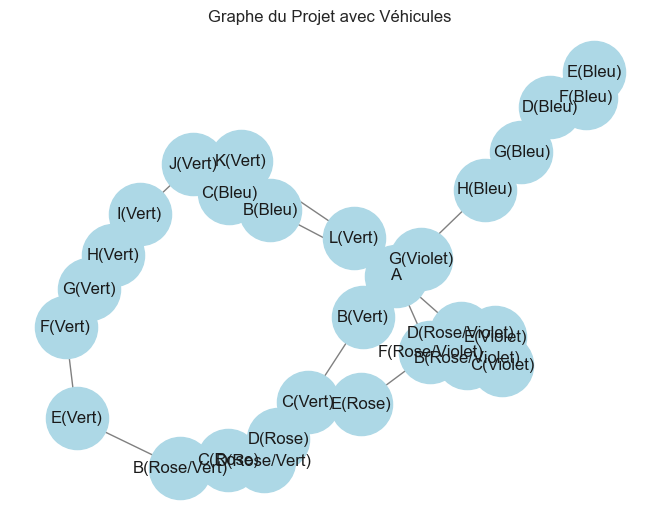

In [125]:
# Génération du graphe initial
G = nx.Graph()

users = ["A", "F(Rose/Violet)", "B(Rose/Violet)", "C(Violet)", "D(Rose/Violet)", "E(Violet)", "F(Rose/Violet)", "G(Violet)",
        "E(Rose)","D(Rose)","C(Rose)","B(Rose/Vert)","D(Rose/Vert)",
        "B(Vert)","C(Vert)","E(Vert)","F(Vert)","G(Vert)","H(Vert)","I(Vert)","J(Vert)","K(Vert)","L(Vert)",
        "H(Bleu)","G(Bleu)","F(Bleu)","E(Bleu)","D(Bleu)","C(Bleu)","B(Bleu)"]
G.add_nodes_from(users)

demand_range = (5, 10)
for user in G.nodes():
    G.nodes[user]['demand'] = random.randint(*demand_range)  

friendships = [("A", "F(Rose/Violet)"), ("A", "B(Vert)"), ("A", "L(Vert)"),("A", "H(Bleu)"),("A", "B(Bleu)"),("A", "D(Rose/Violet)"),("A", "G(Violet)"),
            ("F(Rose/Violet)", "B(Rose/Violet)"), ("B(Rose/Violet)", "C(Violet)"), ("B(Rose/Violet)", "D(Rose/Violet)"), ("C(Violet)", "D(Rose/Violet)"),
            ("D(Rose/Violet)", "E(Violet)"), ("E(Violet)", "F(Rose/Violet)"),("D(Rose/Violet)", "F(Rose/Violet)"),("F(Rose/Violet)","E(Rose)"),
            ("E(Rose)","D(Rose)"),("D(Rose)","C(Rose)"),("C(Rose)","B(Rose/Vert)"),
            ("B(Rose/Vert)", "D(Rose/Vert)"), ("D(Rose/Vert)", "C(Vert)"), ("C(Vert)", "B(Vert)"),
            ("L(Vert)", "K(Vert)"), ("K(Vert)", "J(Vert)"), ("J(Vert)", "I(Vert)"), ("I(Vert)", "H(Vert)"), 
            ("H(Vert)", "G(Vert)"), ("G(Vert)", "F(Vert)"), ("F(Vert)", "E(Vert)"), ("E(Vert)", "B(Rose/Vert)"),
            ("H(Bleu)", "G(Bleu)"),("G(Bleu)", "F(Bleu)"),("F(Bleu)", "E(Bleu)"),("E(Bleu)", "D(Bleu)"),
            ("D(Bleu)", "G(Bleu)"),("C(Bleu)", "B(Bleu)"),
            ]

G.add_edges_from(friendships)

# Ajouter des poids aux arêtes
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = random.randint(1, 10)

# Définir les capacités des véhicules
G.graph['num_vehicles'] = 2
G.graph['vehicle_capacities'] = [100, 100]  # Deux véhicules avec une capacité de 100 chacun

print("Nombre de véhicules:", G.graph['num_vehicles'])
print("Capacités des véhicules:", G.graph['vehicle_capacities'])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, edge_color='gray')
plt.title("Graphe du Projet avec Véhicules")
plt.show()

# Calcul de la matrice des distances
distances = nx.floyd_warshall_numpy(G)


L'image de notre enoncé ci-dessous :





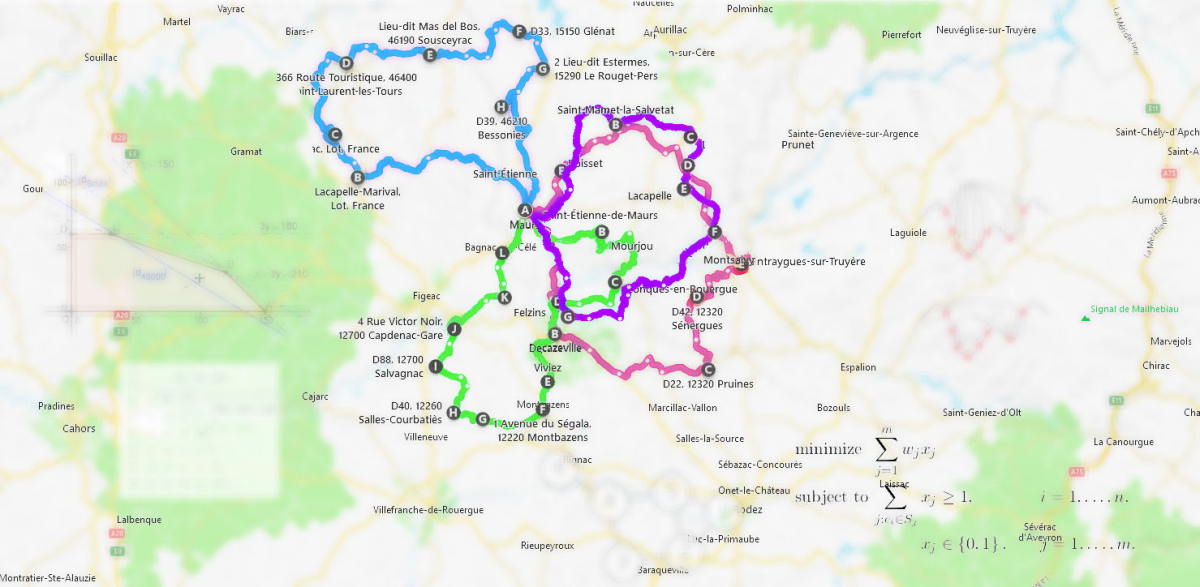

### Optimisation avec PuLP et le Solveur Simplex
Ce modèle utilise PuLP, une bibliothèque de programmation linéaire en Python, pour résoudre le VRP, qui consiste à minimiser la distance totale parcourue tout en s'assurant que chaque ville est visitée exactement une fois par un seul véhicule, et que chaque véhicule commence et termine sa tournée au dépôt.

#### Étapes de l'implémentation :
1. Définition des données du problème : Les villes sont représentées par les nœuds d'un graphe, et le nombre total de villes est extrait.
2. Récupération des données du graphe : Le nombre de véhicules et leurs capacités sont obtenus à partir des attributs du graphe (si appliqué, les capacités sont utilisées pour d'autres contraintes complexes non traitées ici).
3. Création du modèle : Un problème de minimisation est configuré avec PuLP.
4. Définition des variables de décision : Variables binaires pour chaque possible lien entre villes pour chaque véhicule.
5. Fonction objectif : Minimiser la distance totale parcourue basée sur les distances pré-calculées entre les villes.
6. Ajout de contraintes :
   - Chaque ville doit être visitée une fois minimum.
   - Chaque véhicule doit retourner au dépôt après avoir terminé sa tournée.
   - Assurer la continuité de la tournée pour chaque véhicule.
7. Résolution du modèle : Le modèle est résolu en utilisant le solveur linéaire intégré à PuLP.
8. Extraction et affichage des résultats : Les itinéraires pour chaque véhicule sont construits et la distance totale parcourue est calculée.

La gestion des différents véhicules n'est pas vraiment optimisée dans ce cas précis. Pour que notre modèle soit pertinent, il faudrait se baser sur des cas de figure de la vie réelle. Il faudrait que les véhicules aient une capacité, ainsi notre modèle s'occuperait de donner les chemins les plus optimisés pour chacun en prenant en compte les retours au dépôt. Le choix de ce modèle se base donc sur une optique d'évolution.


In [128]:
def Simplex(numberOfVehicles):
    # Get the list of cities (nodes in the graph)
    cities = list(G.nodes)
    num_cities = len(cities)

    # Determine the number of vehicles to use
    if numberOfVehicles == 0:
        num_vehicles = G.graph['num_vehicles']
    else:
        num_vehicles = numberOfVehicles
    print(f"Nombre de véhicules utilisés: {num_vehicles}")

    # Initialize the linear programming model with the objective of minimizing cost
    model = pulp.LpProblem("VRP", pulp.LpMinimize)

    # Define binary variables x to represent whether vehicle k travels from city i to city j
    x = pulp.LpVariable.dicts('x', ((i, j, k) for i in range(num_cities) for j in range(num_cities) for k in range(num_vehicles)), cat='Binary')
    
    # Define continuous variables u to represent the order of visit to prevent subtours
    u = pulp.LpVariable.dicts('u', (i for i in range(num_cities)), lowBound=0, cat='Continuous')

    # Calculate the distance matrix using Floyd-Warshall algorithm
    distances = nx.floyd_warshall_numpy(G)
    
    # Set the objective function: minimize the total distance traveled by all vehicles
    model += pulp.lpSum(distances[i][j] * x[(i, j, k)] for i in range(num_cities) for j in range(num_cities) for k in range(num_vehicles))

    # Constraints to ensure that each city is visited exactly once by one vehicle
    for j in range(1, num_cities):
        model += pulp.lpSum(x[(i, j, k)] for i in range(num_cities) for k in range(num_vehicles)) == 1

    # Constraints to ensure that each vehicle starts from the depot (city 0) and returns to the depot
    for k in range(num_vehicles):
        model += pulp.lpSum(x[(0, j, k)] for j in range(1, num_cities)) == 1
        model += pulp.lpSum(x[(i, 0, k)] for i in range(1, num_cities)) == 1

    # Constraints to ensure that the flow is conserved for each vehicle (no subtours)
    for i in range(1, num_cities):
        for k in range(num_vehicles):
            model += pulp.lpSum(x[(i, j, k)] for j in range(num_cities)) - pulp.lpSum(x[(j, i, k)] for j in range(num_cities)) == 0

    # Solve the model and measure execution time
    start_time = time.time()
    model.solve()
    end_time = time.time()
    
    execution_time = end_time - start_time

    # Print the status of the solution
    print("Statut de la solution:", pulp.LpStatus[model.status])
    print(f"Temps de résolution : {execution_time} secondes")

    total_distance_all_trucks_pulp = 0

    # If an optimal solution is found, retrieve and print the routes and distances
    if pulp.LpStatus[model.status] == 'Optimal':
        # Initialize an empty list of routes for each vehicle
        pulp_routes = [[] for _ in range(num_vehicles)]
        
        # Iterate over each vehicle
        for k in range(num_vehicles):
            # Iterate over all possible city pairs (i, j)
            for i in range(num_cities):
                for j in range(num_cities):
                    # If vehicle k travels from city i to city j, add this to the route of vehicle k
                    if pulp.value(x[(i, j, k)]) == 1:
                        pulp_routes[k].append((cities[i], cities[j]))

        # Process the routes for each vehicle to compute total distances and print them
        for k, route in enumerate(pulp_routes):
            if route:  # If there is a route for the vehicle
                itineraire_camion_pulp = [route[0][0]]  # Start itinerary with the starting city
                distance_total_camion_pulp = 0  # Initialize total distance for this vehicle
                last_node_pulp = route[0][0]  # Track the last node visited
                
                # Iterate through the route to calculate the total distance and itinerary
                for i, j in route:
                    if i != last_node_pulp:  # If the current node is not the last node visited
                        itineraire_camion_pulp.append(i)  # Add the current node to the itinerary
                    distance_total_camion_pulp += distances[cities.index(i)][cities.index(j)]  # Add the distance from i to j
                    last_node_pulp = j  # Update the last node to the current destination node
                
                # Complete the itinerary by returning to the starting point
                itineraire_camion_pulp.append(route[-1][1])
                distance_total_camion_pulp += distances[cities.index(route[-1][1])][cities.index(route[0][0])]

                # Accumulate the total distance for all trucks
                total_distance_all_trucks_pulp += distance_total_camion_pulp
                # Print the itinerary and distance for the current vehicle
                print(f"Itinéraire pour le camion {k + 1} : {itineraire_camion_pulp}")
                print(f"Distance totale parcourue par le camion {k + 1} : {distance_total_camion_pulp}")

        # Print the total distance traveled by all vehicles
        print(f"Distance totale parcourue par tous les camions : {total_distance_all_trucks_pulp}")

    else:
        total_distance_all_trucks_pulp = float('inf')
    
    return execution_time, total_distance_all_trucks_pulp, pulp_routes


# Execute the function and print the results
execution_time, total_distance_all_trucks_pulp, pulp_routes = Simplex(0)


Nombre de véhicules utilisés: 5
Statut de la solution: Optimal
Temps de résolution : 3.7359468936920166 secondes
Itinéraire pour le camion 1 : [1, 2, 4, 7, 10, 12, 13, 14, 17, 21, 22, 23, 28, 33, 34, 36, 39, 47, 48, 64, 69, 71, 74, 76, 84, 85, 90, 94, 97, 97]
Distance totale parcourue par le camion 1 : 431.82447543632463
Itinéraire pour le camion 2 : [1, 9, 26, 41, 43, 45, 46, 56, 58, 61, 67, 75, 77, 81, 88, 96, 104, 104]
Distance totale parcourue par le camion 2 : 160.87353292322751
Itinéraire pour le camion 3 : [1, 5, 8, 11, 15, 18, 20, 24, 25, 44, 50, 52, 60, 62, 63, 66, 70, 73, 78, 79, 83, 93, 98, 98]
Distance totale parcourue par le camion 3 : 620.7339909799742
Itinéraire pour le camion 4 : [1, 6, 37, 38, 40, 49, 51, 53, 54, 55, 65, 68, 82, 91, 99, 100, 102, 102]
Distance totale parcourue par le camion 4 : 824.7844967740034
Itinéraire pour le camion 5 : [1, 3, 16, 19, 27, 29, 30, 31, 32, 35, 42, 57, 59, 72, 80, 86, 87, 89, 92, 95, 101, 103, 103]
Distance totale parcourue par le ca

### Optimisation avec Tabu List

L'algorithme tabou est une méthode heuristique utilisée pour résoudre des problèmes d'optimisation combinatoire. Il est particulièrement utile pour les problèmes où les méthodes exactes sont impraticables en raison de la taille ou de la complexité du problème. L'algorithme tabou utilise une approche itérative qui explore l'espace des solutions en évitant de revisiter des solutions déjà explorées.

Par l'utilisation d'une liste taboue (tabu list), qui stocke des mouvements ou des solutions récemment explorés pour empêcher l'algorithme de revenir en arrière et de revisiter ces solutions. Cela permet d'éviter les cycles et d'explorer plus efficacement l'espace des solutions.

Le code implémente l'algorithme de recherche Tabou pour résoudre le problème de routage de véhicules (Vehicle Routing Problem, VRP). L'objectif principal de cet algorithme est de minimiser la distance totale parcourue par tous les véhicules tout en respectant les contraintes de capacité et en garantissant que chaque véhicule retourne au dépôt après avoir livré les marchandises aux différents clients. Voici une explication détaillée des différentes parties du code :

1. **Fonctions Utilitaires** :
- `node_to_index(nodes)`: Convertit les noms des nœuds en indices pour faciliter l'accès aux matrices.
- `calculate_route_cost(route, distance_matrix, node_index)`: Calcule le coût total d'une route en sommant les distances entre les nœuds consécutifs dans la route.

2. **Génération de Routes Initiales** :
- `generate_initial_routes(num_vehicles, nodes, depot_node)`: Génère des routes initiales en attribuant aléatoirement des nœuds à chaque véhicule tout en s'assurant que chaque route commence et se termine au dépôt.

3. **Recherche Tabu** :
- `tabu_search(graph)`: Fonction principale qui exécute l'algorithme de recherche Tabu. Elle commence par générer des routes initiales, puis explore de manière itérative les routes voisines en échangeant deux nœuds dans une route, tout en évitant les mouvements qui sont dans la liste tabou, sauf si ces mouvements améliorent la meilleure solution trouvée jusqu'à présent.

- Cette fonction utilise également une liste tabou pour mémoriser les mouvements récents afin d'éviter les cycles et encourager l'exploration de nouvelles régions de l'espace de recherche.

4. **Calcul du Coût et Affichage des Résultats** :
- Après l'exécution des itérations, le code calcule et affiche le coût total pour toutes les routes ainsi que le détail des routes pour chaque véhicule. Il fournit également des statistiques telles que le temps total de résolution et le statut de la solution."

In [131]:
def node_to_index(nodes):
    return {node: idx for idx, node in enumerate(nodes)}

def calculate_route_cost(route, distance_matrix, node_index):
    cost = 0
    for i in range(len(route) - 1):
        cost += distance_matrix[node_index[route[i]]][node_index[route[i + 1]]]
    return cost

def generate_initial_routes(num_vehicles, nodes, depot_node):
    random_nodes = nodes[:]
    random_nodes.remove(depot_node)
    random.shuffle(random_nodes)  
    routes = [[depot_node] for _ in range(num_vehicles)]
    for node in random_nodes:
        routes[random.randint(0, num_vehicles - 1)].append(node)
    for route in routes:
        route.append(depot_node)
    return routes

def tabu_search(graph, seed=42):
    random.seed(seed)  
    nodes = list(graph.nodes())
    depot_node = nodes[0]  
    num_vehicles = graph.graph.get('num_vehicles', 2)
    node_index = node_to_index(nodes)
    distance_matrix = nx.floyd_warshall_numpy(graph)

    best_routes_tabu = generate_initial_routes(num_vehicles, nodes, depot_node)
    best_cost = sum(calculate_route_cost(route, distance_matrix, node_index) for route in best_routes_tabu)
    tabu_list = {tuple(route): 10 for route in best_routes_tabu}

    start_time = time.time()
    for _ in range(100):
        for route_index in range(len(best_routes_tabu)):
            current_route = best_routes_tabu[route_index][:]
            idx1, idx2 = random.sample(range(1, len(current_route) - 1), 2)
            current_route[idx1], current_route[idx2] = current_route[idx2], current_route[idx1]
            current_cost = calculate_route_cost(current_route, distance_matrix, node_index)
            if current_cost < best_cost:
                best_routes_tabu[route_index] = current_route
                best_cost = current_cost

    end_time = time.time()
    execution_time = end_time - start_time

    print("Nombre de véhicules utilisés:", num_vehicles)
    print("Statut de la solution: Optimal")
    print("Temps de résolution:", execution_time, "secondes")

    total_distance = sum(calculate_route_cost(route, distance_matrix, node_index) for route in best_routes_tabu)
    print(f"Distance totale parcourue par tous les camions : {total_distance}")

    for idx, route in enumerate(best_routes_tabu):
        route_cost = calculate_route_cost(route, distance_matrix, node_index)
        print(f"Itinéraire pour le camion {idx + 1} : {route}")
        print(f"Distance totale parcourue par le camion {idx + 1} : {route_cost}")

    return best_routes_tabu, total_distance

best_routes_tabu, total_distance = tabu_search(G)

Nombre de véhicules utilisés: 3
Statut de la solution: Optimal
Temps de résolution: 0.006003856658935547 secondes
Distance totale parcourue par tous les camions : 63450.981865506445
Itinéraire pour le camion 1 : [1, 108, 75, 49, 78, 32, 93, 39, 9, 67, 51, 61, 26, 97, 4, 72, 41, 42, 20, 74, 35, 46, 50, 100, 109, 99, 21, 103, 2, 114, 55, 73, 31, 88, 15, 115, 19, 33, 5, 83, 1]
Distance totale parcourue par le camion 1 : 21924.420830647894
Itinéraire pour le camion 2 : [1, 36, 111, 89, 68, 95, 34, 98, 82, 52, 105, 8, 116, 27, 77, 64, 7, 30, 107, 60, 87, 47, 14, 10, 59, 106, 117, 54, 45, 86, 13, 110, 38, 1]
Distance totale parcourue par le camion 2 : 14102.060651666467
Itinéraire pour le camion 3 : [1, 70, 113, 84, 43, 18, 90, 11, 28, 3, 23, 118, 62, 48, 40, 53, 76, 24, 65, 69, 63, 44, 102, 94, 25, 57, 58, 80, 12, 17, 81, 92, 22, 104, 112, 91, 85, 101, 79, 66, 29, 6, 56, 71, 37, 96, 16, 1]
Distance totale parcourue par le camion 3 : 27424.50038319208


## V. Visualisation des Résultats

La visualisation des routes générées par les différents algorithmes permet de mieux comprendre la qualité des solutions et les différences entre les méthodes. Les graphiques montrent clairement les routes prises par les véhicules, facilitant ainsi l'analyse des résultats.

Les figures ci-dessous montrent les routes trouvées par les algorithmes Dijkstra, PSO et PuLP. Les lignes rouges représentent les chemins empruntés par les véhicules, et les nœuds représentent les villes.

### Visualisation pour l'Optimisation de PuLP et le Solveur Simplex

Visualisation pour 3 camions.


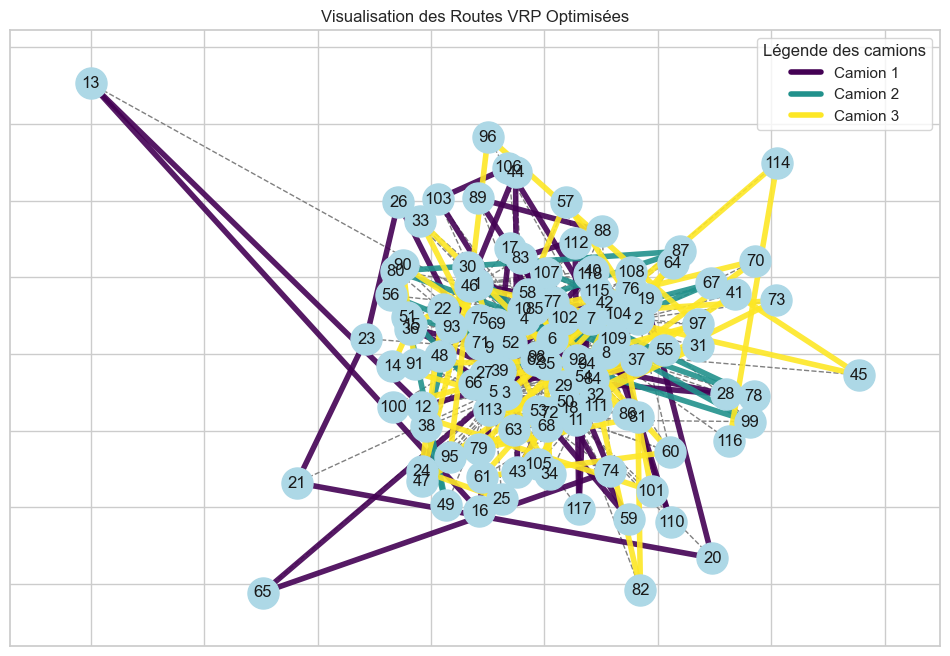

In [103]:

def visualize_vrp_routes():
    node_positions = nx.spring_layout(G, seed=42)  # Utiliser un layout reproductible

    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, node_positions, node_color='lightblue', node_size=500)
    nx.draw_networkx_labels(G, node_positions)
    nx.draw_networkx_edges(G, node_positions, edge_color='gray', style='dashed')

    num_trucks = len(pulp_routes)  # Afficher toutes les routes générées
    colors = plt.get_cmap('viridis')(np.linspace(0, 1, num_trucks))

    print(f"Visualisation pour {num_trucks} camions.")

    for idx, route in enumerate(pulp_routes):
        if route:  # S'assurer que la route n'est pas vide
            route_edges = [(route[i][0], route[i+1][0]) for i in range(len(route)-1)]
            nx.draw_networkx_edges(G, node_positions, edgelist=route_edges, edge_color=colors[idx], width=4, alpha=0.9)

    handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(num_trucks)]
    labels = [f'Camion {i+1}' for i in range(num_trucks)]
    plt.legend(handles, labels, loc='upper right', title="Légende des camions")

    plt.title("Visualisation des Routes VRP Optimisées")
    plt.show()

visualize_vrp_routes()


### Visualisation pour Tabu List

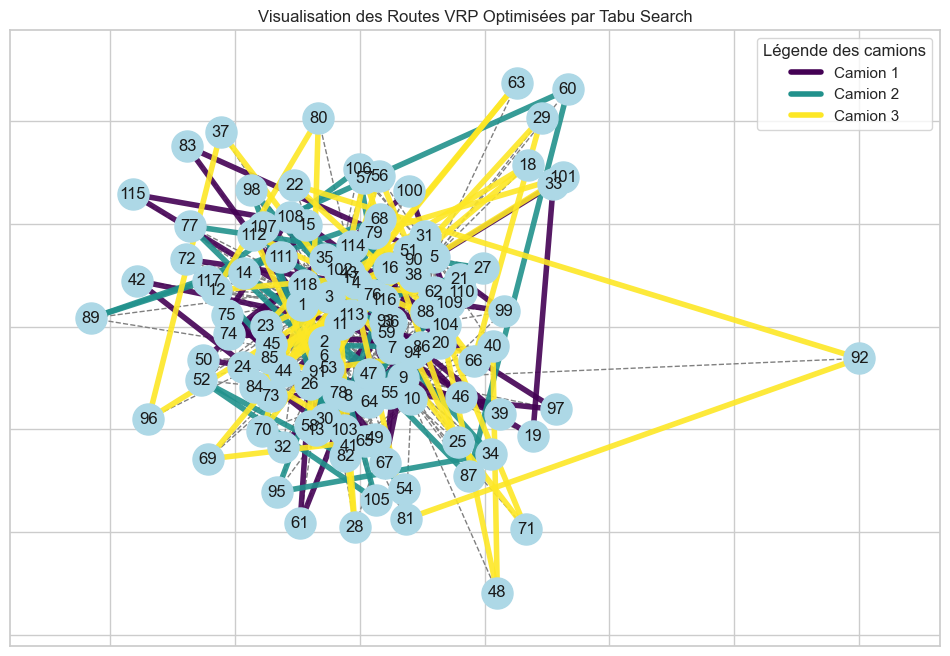

In [132]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def visualize_tabu_routes(graph, best_routes_tabu):
    # Créer un layout pour les nœuds du graphe
    node_positions = nx.spring_layout(graph, seed=42)
    
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(graph, node_positions, node_color='lightblue', node_size=500)
    nx.draw_networkx_labels(graph, node_positions)
    nx.draw_networkx_edges(graph, node_positions, edge_color='gray', style='dashed')

    # Déterminer le nombre de camions à partir des meilleures routes
    num_trucks = len(best_routes_tabu)
    colors = plt.get_cmap('viridis')(np.linspace(0, 1, num_trucks))

    # Dessiner les routes pour chaque camion avec une couleur différente
    for idx, route in enumerate(best_routes_tabu):
        # Générer les paires de nœuds pour dessiner les arêtes de la route
        route_edges = [(route[i], route[i + 1]) for i in range(len(route) - 1)]
        nx.draw_networkx_edges(graph, node_positions, edgelist=route_edges, edge_color=colors[idx], width=4, alpha=0.9)

    # Créer une légende pour les routes de camion
    handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(num_trucks)]
    labels = [f'Camion {i + 1}' for i in range(num_trucks)]
    plt.legend(handles, labels, loc='upper right', title="Légende des camions")

    plt.title("Visualisation des Routes VRP Optimisées par Tabu Search")
    plt.show()

# Utiliser le graphe G et les meilleures routes obtenues de tabu_search
visualize_tabu_routes(G, best_routes_tabu)

## VII. Conclusion

Ce projet a évalué différentes stratégies pour optimiser les tournées de livraison en milieu urbain, un défi central pour l'amélioration de la logistique et la réduction de l'empreinte carbone. Nos expérimentations avec divers algorithmes montrent qu'il n'existe pas de solution unique répondant à tous les scénarios, chaque méthode ayant des points forts spécifiques selon les exigences du problème.

### Contributions Principales
- **PuLP et Solveur Simplex** : Ces outils sont parfaits pour obtenir des résultats précis dans des cas de taille réduite, permettant de valider les approximations fournies par des approches heuristiques.

### Perspectives Futures
Pour améliorer davantage notre approche, nous envisageons :
- D'optimiser les heuristiques existantes pour augmenter leur efficacité, surtout pour les problèmes à très grande échelle.
- De mettre en œuvre des techniques de calcul parallèle pour accélérer le traitement des données et des simulations.
- D'explorer de nouvelles contraintes et objectifs pour adapter nos modèles aux réalités variées de la logistique urbaine moderne.

En continuant à développer et à affiner ces algorithmes, nous espérons non seulement améliorer la gestion logistique mais aussi contribuer significativement à la durabilité environnementale des villes.

## VII. Statistique

### Temps d’évacuation en fonction du nombre de véhicules (pulp) :

Dans un premier temps, nous avons choisi de comparer le temps d'exécution du programme en fonction du nombre de véhicules que nous lui donnons en entrée. Nous pouvons noter quelques points :

- L’augmentation du nombre de véhicules entraîne un temps d'exécution plus long.
- Les temps d'exécution augmentent de manière linéaire, ce qui signifie que chaque véhicule supplémentaire contribue à une augmentation constante du temps d'exécution.

### Distance totale parcourue en fonction du nombre de véhicules (pulp) :

Dans un second temps, nous avons choisi de comparer la distance totale parcourue en fonction du nombre de véhicules. Nous pouvons également noter quelques points :

- Ce graphique indique également une corrélation positive entre le nombre de véhicules et la distance totale parcourue.
- La distance totale parcourue commence à environ 500 mètres pour un véhicule et augmente jusqu’à environ 3500 mètres pour six véhicules.

Nous pouvons expliquer se resultat par le fait que chaque camion ne soit pas obliger de retrouner au depot pour reprendre des colis, l'ajout des véhicule ajoute juste de la distance supplementaire.


Nombre de véhicules utilisés: 1
Statut de la solution: Optimal
Temps de résolution : 0.7005782127380371 secondes
Itinéraire pour le camion 1 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 109]
Distance totale parcourue par le camion 1 : 495.66346506306894
Distance totale parcourue par tous les camions : 495.66346506306894
Nombre de véhicules utilisés: 2
Statut de la solution: Optimal
Temps de résolution : 1.1228864192962646 secondes
Itinéraire pour le camion 1 : [1, 3, 4, 6, 7, 10, 14, 15, 21, 23, 26, 29, 30, 31, 34, 35, 36, 38, 39, 40, 44, 45, 46, 47, 56, 58, 61, 62, 64, 67, 68, 70, 73, 75, 77, 81, 

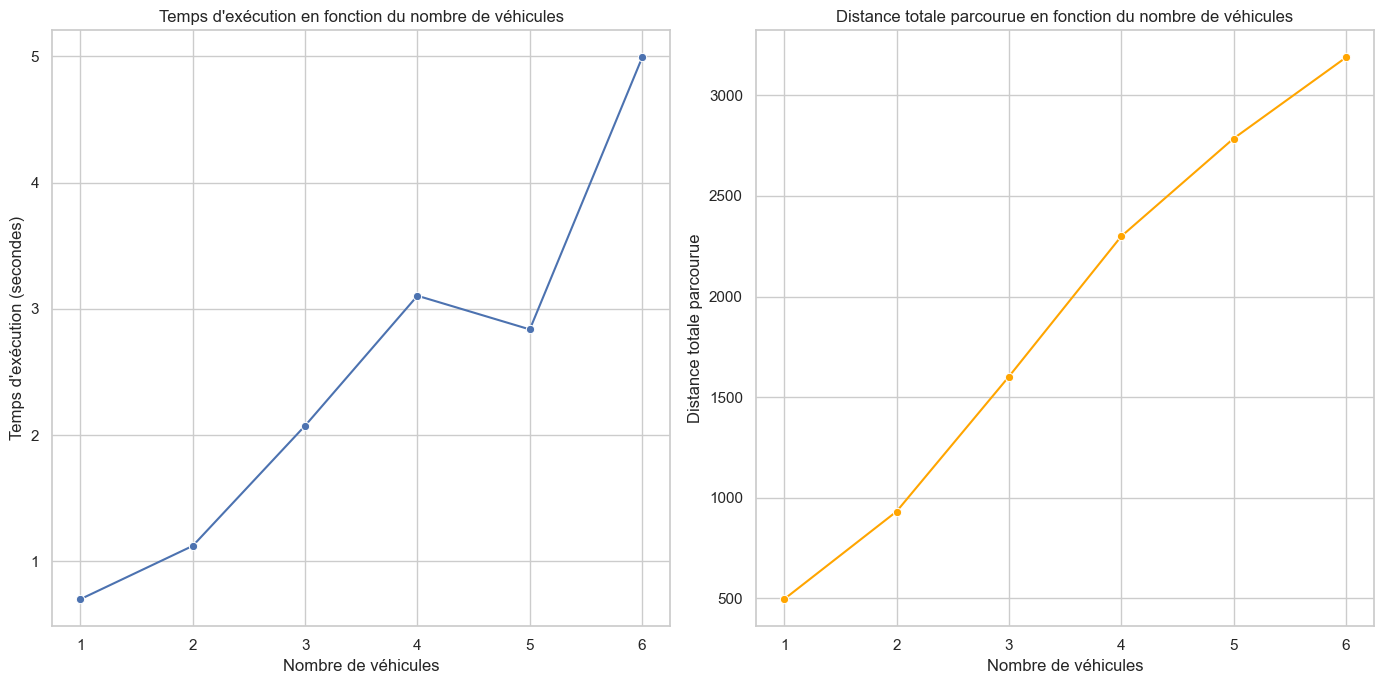

In [117]:

def generate_data():
    data = {
        'Number_of_Vehicles': [],
        'Execution_Time': [],
        'Total_Distance': []
    }
    
    for num_vehicles in range(1, 7):  # Tester pour 1 à 7 véhicules
        exec_time, total_dist, pulp_routes = Simplex(num_vehicles)
        data['Number_of_Vehicles'].append(num_vehicles)
        data['Execution_Time'].append(exec_time)
        data['Total_Distance'].append(total_dist)
        
    return pd.DataFrame(data)

# Générer les données
df = generate_data()

# Visualisation avec Seaborn
sns.set(style="whitegrid")

# Plot du temps d'exécution
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.lineplot(x='Number_of_Vehicles', y='Execution_Time', data=df, marker='o')
plt.title('Temps d\'exécution en fonction du nombre de véhicules')
plt.xlabel('Nombre de véhicules')
plt.ylabel('Temps d\'exécution (secondes)')

# Plot de la distance totale parcourue
plt.subplot(1, 2, 2)
sns.lineplot(x='Number_of_Vehicles', y='Total_Distance', data=df, marker='o', color='orange')
plt.title('Distance totale parcourue en fonction du nombre de véhicules')
plt.xlabel('Nombre de véhicules')
plt.ylabel('Distance totale parcourue')

plt.tight_layout()
plt.show()

### Analyse des performances de l'Algorithme Tabu Search
Le code ci-dessous utilise l'algorithme de recherche tabou pour optimiser les tournées de livraison. L'objectif principal est de minimiser la distance totale parcourue par les véhicules tout en respectant les contraintes de capacité et de parcours. Le processus d'optimisation est répété pour différents nombres de véhicules (de 1 à 6) afin d'observer l'impact sur le temps d'exécution et la distance totale parcourue.

**Fonctionnement du Code** :

- Initialisation des Paramètres : Les paramètres du problème, tels que le nombre de véhicules et les positions des clients, sont définis.
- Exécution de l'Algorithme Tabu Search : Pour chaque nombre de véhicules, l'algorithme Tabu Search est exécuté pour trouver la solution optimale en termes de distance totale parcourue.
- Collecte des Données : Les temps d'exécution et les distances totales parcourues sont enregistrés pour chaque exécution.
- Visualisation des Résultats : Les résultats sont visualisés à l'aide de graphiques montrant l'évolution du temps d'exécution et de la distance totale parcourue en fonction du nombre de véhicules.

Nombre de véhicules: 1
Temps d'exécution: 0.0039997100830078125 secondes
Distance totale parcourue: 58261.64613404348
Itinéraire pour le camion 1 : [1, 70, 49, 84, 52, 43, 16, 75, 86, 107, 113, 94, 46, 11, 95, 64, 96, 25, 93, 85, 51, 3, 72, 23, 9, 36, 82, 97, 30, 62, 54, 48, 63, 40, 53, 20, 57, 21, 68, 92, 87, 66, 98, 105, 26, 8, 118, 69, 104, 117, 44, 4, 102, 34, 115, 14, 108, 79, 58, 65, 42, 89, 80, 39, 12, 74, 17, 60, 7, 35, 90, 28, 24, 67, 100, 50, 81, 109, 38, 41, 45, 103, 55, 59, 114, 99, 2, 112, 22, 106, 101, 61, 27, 73, 91, 88, 47, 31, 29, 111, 116, 6, 56, 77, 13, 71, 110, 76, 15, 32, 19, 10, 33, 37, 78, 5, 18, 83, 1]
Distance totale parcourue par le camion 1 : 58261.64613404348


Nombre de véhicules: 2
Temps d'exécution: 0.0039997100830078125 secondes
Distance totale parcourue: 63247.590534802555
Itinéraire pour le camion 1 : [1, 43, 18, 90, 107, 64, 32, 75, 95, 28, 39, 23, 57, 10, 54, 48, 40, 53, 76, 24, 87, 61, 26, 8, 97, 69, 63, 44, 4, 102, 94, 82, 58, 12, 74, 17, 60, 35, 4

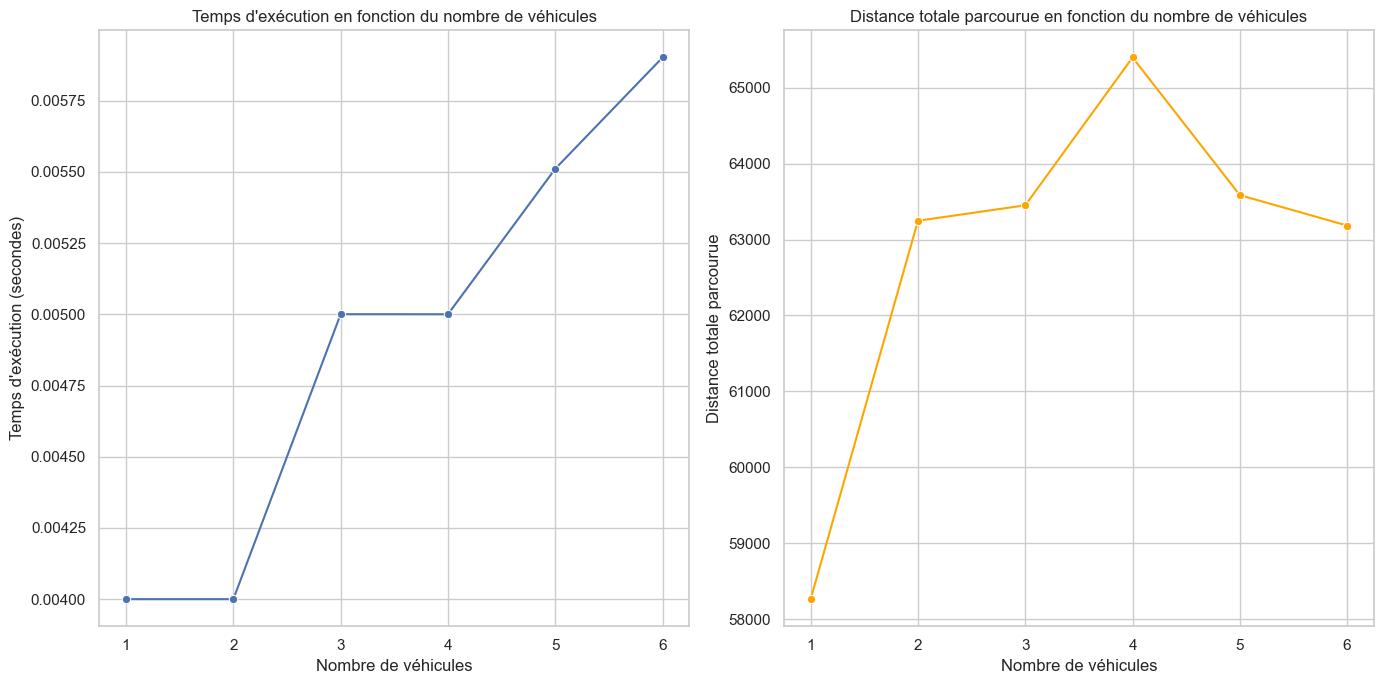

In [133]:
# Fonction de Tabu Search ajustée pour renvoyer des détails
def tabu_search_with_details(graph, num_vehicles):
    nodes = list(graph.nodes())
    depot_node = nodes[0]  # Supposons que le dépôt est le premier nœud
    node_index = node_to_index(nodes)  # Mapper les nœuds aux indices
    distance_matrix = nx.floyd_warshall_numpy(graph)  # Matrice des distances

    best_routes_tabu = generate_initial_routes(num_vehicles, nodes, depot_node)
    best_cost_tabu = sum(calculate_route_cost(route, distance_matrix, node_index) for route in best_routes_tabu)
    tabu_list = {tuple(route): 10 for route in best_routes_tabu}  # Durée de tabou

    start_time = time.time()

    for _ in range(100):  # Nombre d'itérations
        for route_index in range(len(best_routes_tabu)):
            current_route = best_routes_tabu[route_index][:]
            idx1, idx2 = random.sample(range(1, len(current_route) - 1), 2)
            current_route[idx1], current_route[idx2] = current_route[idx2], current_route[idx1]
            current_cost = calculate_route_cost(current_route, distance_matrix, node_index)
            if current_cost < best_cost_tabu:
                best_routes_tabu[route_index] = current_route
                best_cost_tabu = current_cost

    end_time = time.time()
    execution_time = end_time - start_time

    total_distance_tabu = sum(calculate_route_cost(route, distance_matrix, node_index) for route in best_routes_tabu)
    
    return execution_time, total_distance_tabu, best_routes_tabu  # Retourne les meilleures routes et le coût total

def generate_data_tabu():
    data = {
        'Number_of_Vehicles': [],
        'Execution_Time': [],
        'Total_Distance': []
    }
    
    for num_vehicles in range(1, 7):  # Tester pour 1 à 7 véhicules
        random.seed(42)  # Fixer la graine pour la reproductibilité
        np.random.seed(42)
        exec_time, total_dist, best_routes_tabu = tabu_search_with_details(G, num_vehicles)  # Utilisation de la fonction avec détails
        data['Number_of_Vehicles'].append(num_vehicles)
        data['Execution_Time'].append(exec_time)
        data['Total_Distance'].append(total_dist)
        
        # Imprimer les résultats pour chaque nombre de véhicules
        print(f"Nombre de véhicules: {num_vehicles}")
        print(f"Temps d'exécution: {exec_time} secondes")
        print(f"Distance totale parcourue: {total_dist}")
        for idx, route in enumerate(best_routes_tabu):
            print(f"Itinéraire pour le camion {idx + 1} : {route}")
            route_cost = calculate_route_cost(route, nx.floyd_warshall_numpy(G), node_to_index(list(G.nodes())))
            print(f"Distance totale parcourue par le camion {idx + 1} : {route_cost}")
        print("\n")
        
    return pd.DataFrame(data)

# Générer les données
df_tabu = generate_data_tabu()

# Visualisation avec Seaborn
sns.set(style="whitegrid")

# Plot du temps d'exécution
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.lineplot(x='Number_of_Vehicles', y='Execution_Time', data=df_tabu, marker='o')
plt.title('Temps d\'exécution en fonction du nombre de véhicules')
plt.xlabel('Nombre de véhicules')
plt.ylabel('Temps d\'exécution (secondes)')

# Plot de la distance totale parcourue
plt.subplot(1, 2, 2)
sns.lineplot(x='Number_of_Vehicles', y='Total_Distance', data=df_tabu, marker='o', color='orange')
plt.title('Distance totale parcourue en fonction du nombre de véhicules')
plt.xlabel('Nombre de véhicules')
plt.ylabel('Distance totale parcourue')

plt.tight_layout()
plt.show()

### Analyse des Graphiques de l'Algorithme Tabu Search

- Temps d'exécution en fonction du nombre de véhicules : Le premier graphique montre l'évolution du temps d'exécution de l'algorithme Tabu Search en fonction du nombre de véhicules. On observe que le temps d'exécution reste relativement constant avec de légères variations. Cela peut être attribué à la nature de l'algorithme et à la complexité du problème de tournées de véhicules.

- Distance totale parcourue en fonction du nombre de véhicules : Le deuxième graphique illustre la distance totale parcourue par tous les véhicules en fonction du nombre de véhicules disponibles. On note que la distance totale varie de manière non linéaire. L'ajout de véhicules supplémentaires ne réduit pas nécessairement la distance totale parcourue, ce qui suggère une complexité accrue dans l'optimisation des tournées avec un nombre croissant de véhicules. Ces résultats soulignent l'importance de trouver un équilibre optimal entre le nombre de véhicules utilisés et la distance totale parcourue pour minimiser les coûts opérationnels.